In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
# Define dataset parameters
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50


In [3]:
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
# Split the dataset into training, validation, and test sets
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [5]:
# Preprocess the data for the ANN model
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

train_ds = train_ds.map(lambda x, y: (resize_and_rescale(x), y))
val_ds = val_ds.map(lambda x, y: (resize_and_rescale(x), y))
test_ds = test_ds.map(lambda x, y: (resize_and_rescale(x), y))

In [6]:
# Define the ANN model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(dataset.class_names)

ann_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])


In [7]:
# Compile the ANN model
ann_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [8]:
# Train the ANN model
ann_history = ann_model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/50
54/54 [==============================] - 32s 339ms/step - loss: 18.6282 - accuracy: 0.6144 - val_loss: 2.8936 - val_accuracy: 0.5729
Epoch 2/50
54/54 [==============================] - 19s 320ms/step - loss: 4.1023 - accuracy: 0.6819 - val_loss: 3.8292 - val_accuracy: 0.6012
Epoch 3/50
54/54 [==============================] - 20s 346ms/step - loss: 2.3939 - accuracy: 0.6979 - val_loss: 1.6563 - val_accuracy: 0.7604
Epoch 4/50
54/54 [==============================] - 18s 296ms/step - loss: 2.5275 - accuracy: 0.7160 - val_loss: 0.2963 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 17s 282ms/step - loss: 1.5285 - accuracy: 0.7835 - val_loss: 0.4409 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 17s 294ms/step - loss: 0.7469 - accuracy: 0.8439 - val_loss: 0.3862 - val_accuracy: 0.8802
Epoch 7/50
54/54 [==============================] - 21s 339ms/step - loss: 2.2657 - accuracy: 0.7541 - val_loss: 0.4954 - val_accuracy: 0.901

In [9]:
# Evaluate the ANN model on the test set
ann_scores = ann_model.evaluate(test_ds)

8/8 [==============================] - 2s 33ms/step - loss: 0.0423 - accuracy: 0.9805


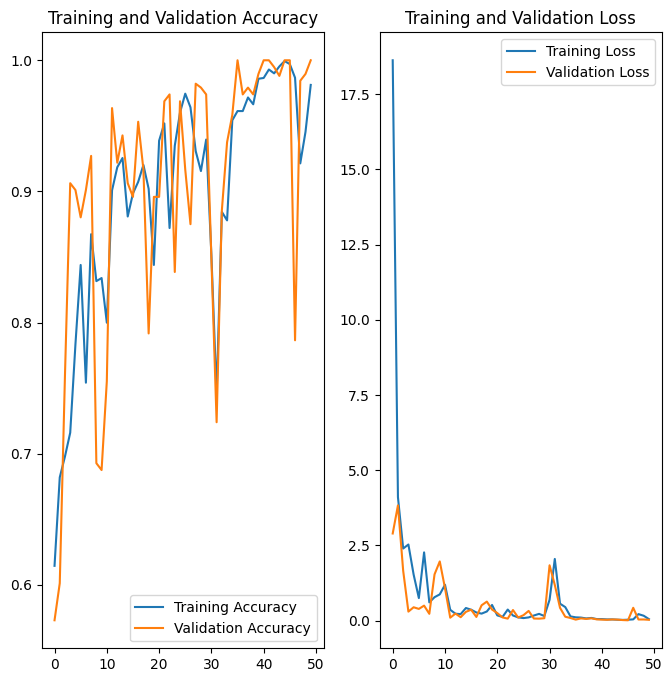

In [10]:
# Visualize training and validation curves for the ANN model
ann_acc = ann_history.history['accuracy']
ann_val_acc = ann_history.history['val_accuracy']

ann_loss = ann_history.history['loss']
ann_val_loss = ann_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), ann_acc, label='Training Accuracy')
plt.plot(range(EPOCHS), ann_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), ann_loss, label='Training Loss')
plt.plot(range(EPOCHS), ann_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [11]:
# Print evaluation scores
print("Test Loss:", ann_scores[0])
print("Test Accuracy:", ann_scores[1])

Test Loss: 0.0423189252614975
Test Accuracy: 0.98046875
